In [1]:
import pandas as pd

"""Import"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [2]:

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


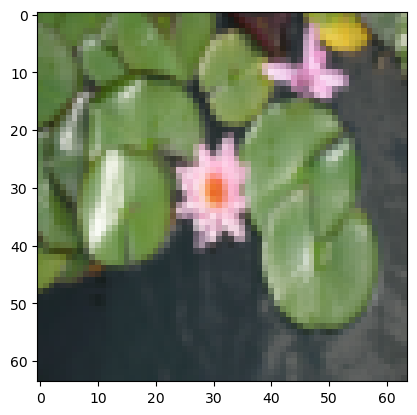

In [4]:
index = 26
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [7]:
print(train_set_x_flatten[1]) # vector of pixels
train_set_x = train_set_x_flatten/255.0
test_set_x = test_set_x_flatten/255.0

[ 31 192  71  22   9  79  57  22  68  47 180   6 153  16  75 194 254 218
 200   2  23  64 178 193 104  15 116  36  25 181  29 190 234 104 159  34
  39 172  30 104 166   6  33 255 105   0  60  48  39  39 168 143  83  32
  12 255  31 136  72  43  66 119 128 128  43  96 231  69 134 109  16   5
   9  84 102 111  32  16  49  21 113 188  35 253 122  43  32  49 128  41
 119  69  28 111 140  95 155 190 135  72 179  86  23 122  33 132 172 126
  69  64 135 161  27 187 142 200  67  67 234 194 131 102  77 102 156  68
  40  21 122  16  78 238  78   1   8 255  85 206  99 172   0 175 248  19
  31 129 129 111  40 161 193  10  54 169  27 129  27  58 172  13  41  76
  85 110 155  52 230 139  10  67 212 165 150 133  25   8 117 133  39  89
 242   2  82  81 108 161  38  42 201 180 128 253 155 189  31   0  93  72
 102  50 255  57 158 111 200  11 155  24  28]


# Build the parts of Logistic Regression


## Sigmoid
It's a function which changes the number to diapason of 0 to 1

In [8]:
def sigmoid(z):
    """
    Computes the sigmoid
    :param z: A scalar or numpy array any size
    :return: all elements in z with sigmoid applied 
    """
    s = z * (z>0)
    return s

In [9]:
print ("sigmoid([10, 3]) = " + str(sigmoid(np.array([10,3]))))


sigmoid([10, 3]) = [10  3]


## Initialize a w and b from algorithm
First create 


In [10]:
def intialize_with_zeroes(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float"""
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

In [11]:
dim = 3
w,b = intialize_with_zeroes(dim)
print(type(b))
print ("w = " + str(w))
print ("b = " + str(b))

<class 'float'>
w = [[0.]
 [0.]
 [0.]]
b = 0.0


In [12]:
a= np.random.rand(1,3)

y  = np.random.rand(1,3)
x = np.random.rand(2,3)
print(a.reshape(-1,1)@y)

[[0.21820422 0.89644165 0.15934826]
 [0.02652911 0.10898872 0.01937345]
 [0.01283019 0.05270987 0.00936952]]


In [13]:
import numpy as np

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]  # number of examples

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    cost = np.squeeze(cost)  # remove single-dimensional entries from the shape of an array

    grads = {"dw": dw,
             "db": db}

    return grads, cost




In [14]:
w =  np.array([[1.], [2]])
b = 1.5

X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[2.83333333]
 [7.41666667]]
db = 2.333333333333333
cost = nan


C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost


## Gradient Optimization

In [15]:
import copy

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        grads , cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate* dw
        b = b - learning_rate *db

        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))


w = [[0.1193431 ]
 [0.13780173]]
b = 0.920302028412334
dw = [[0.20032664]
 [0.03268238]]
db = 0.18837631206593652
Costs = [nan]


C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost


## Predict


In [17]:

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(w.T @ X + b)
    Y_prediction = np.where(A>0.5,1,0)
    return Y_prediction

In [18]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[0 0 0]]


In [19]:


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    w,b = intialize_with_zeroes(X_train.shape[0])
    params,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [20]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan


C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost


Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 68.89952153110048 %
test accuracy: 34.0 %


y = 1, you predicted that it is a "non-cat" picture.


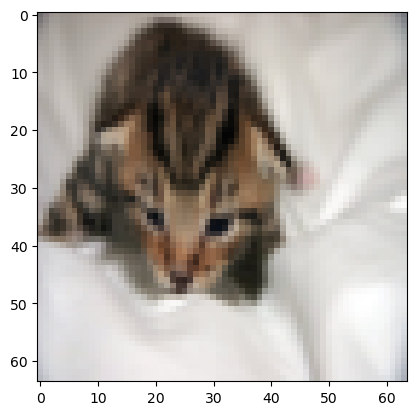

In [21]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

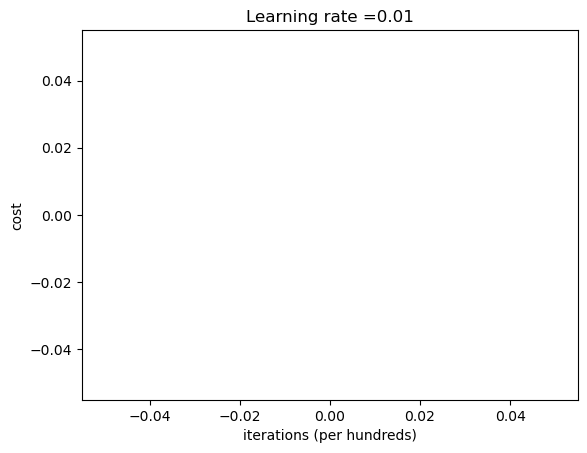

In [22]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01


C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
C:\Users\strat\AppData\Local\Temp\ipykernel_17104\4129287653.py:23: RuntimeWarning: invalid value encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost



-------------------------------------------------------

Training a model with learning rate: 0.02

-------------------------------------------------------

Training a model with learning rate: 0.03

-------------------------------------------------------

Training a model with learning rate: 0.04

-------------------------------------------------------

Training a model with learning rate: 0.05

-------------------------------------------------------

Training a model with learning rate: 0.06

-------------------------------------------------------

Training a model with learning rate: 0.07

-------------------------------------------------------

Training a model with learning rate: 0.08

-------------------------------------------------------

Training a model with learning rate: 0.09

-------------------------------------------------------



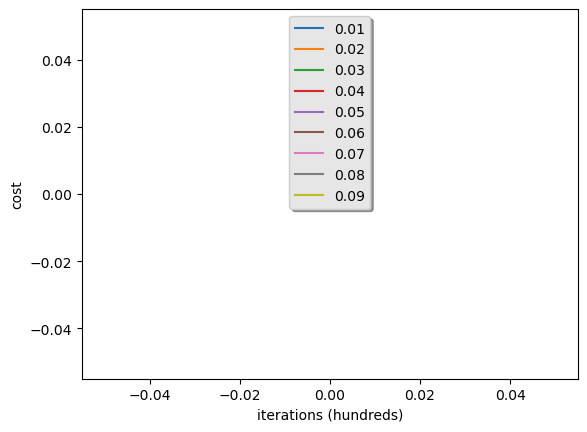

In [23]:
learning_rates = [i/100 for i in range(1,10,1)]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 0, your algorithm predicts a "non-cat" picture.


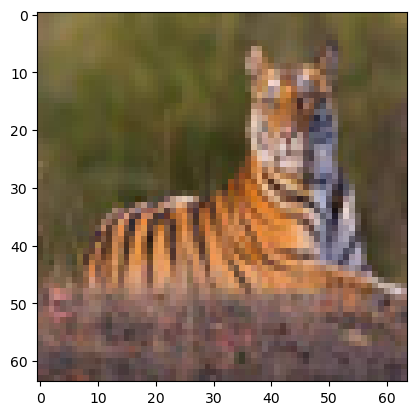

In [24]:
my_image = "my_image.jpg"

# We preprocess the image to fit your algorithm.
fname =  my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")